# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

## Juan Diego Barnes, Francisco Legaspe, Rodrigo Martin

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

Comenzamos cargando el conjunto de módulos o librerías que utilizaremos

In [1]:
import matplotlib.pyplot as plt # Para graficar
import requests # Para hacer pedidos a la web
from bs4 import BeautifulSoup # Para parsear el HTML
import pandas as pd # Para manipular los datos

#### Ejercicio 1
Nuestro objetivo es conectarnos a la API de Mercado Libre, para obtener los ítems de una consulta de búsqueda. Principalmente estamos interesados en obtener los precios, nuestra búsqueda de precios se realiza sobre los libros de Big Data de Walter, queriendo conocer la distribución de precios de estos.

In [2]:
# URL de la página a scrapear
busqueda = "big data walter sosa escudero"

r = requests.get('https://listado.mercadolibre.com.ar/{}#D[A:{}]'.format(busqueda.replace(' ','-'),busqueda))

contenido = r.content
soup = BeautifulSoup(contenido, 'html.parser')


<!DOCTYPE html>

<html lang="es-AR">
<head><link href="https://www.google-analytics.com" rel="preconnect"/><link href="https://www.google.com" rel="preconnect"/><link href="https://data.mercadolibre.com" rel="preconnect"/><link href="https://http2.mlstatic.com" rel="preconnect"/><link href="https://stats.g.doubleclick.net" rel="preconnect"/><link href="https://analytics.mercadolibre.com.ar" rel="preconnect"/><link href="https://analytics.mercadolibre.com" rel="preconnect"/><link href="https://www.google.com.ar" rel="preconnect"/><script nonce="Hoo9/tIx/ujSfue/8cSczw==" type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":383.255455,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"b9a52ece284d8f4e"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},aj

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [3]:
alldivs = soup.find_all('div',{ 'class':'andes-card'})
#Array donde estarán los productos
productos_array = []
#Extraigo los datos de cada producto y los guardo
for item in alldivs:
    data={}
    data['Nombre']=item.find('h2',{'class':'ui-search-item__title'}).text
    precio_symbol = item.find('span', {'class': 'andes-money-amount__currency-symbol'}).text
    precio_fraction = item.find('span', {'class': 'andes-money-amount__fraction'}).text
    data['Precio'] = f'{precio_symbol}{precio_fraction}'
    
    productos_array.append(data)
    print(data)
    #Creamos el dataframe con los datos extraidos
    productos_df = pd.DataFrame(productos_array)
    

{'Nombre': 'Borges, Big Data Y Yo - Sosa Escudero, Walter', 'Precio': '$5.190'}
{'Nombre': 'Borges Big Data Y Yo - Guia Nerd Y Un Poco Rea Para Perderse', 'Precio': '$5.190'}
{'Nombre': 'Big Data - Walter Sosa Escudero - Siglo Xxi - Libro', 'Precio': '$5.990'}
{'Nombre': 'Big Data - Walter Sosa Escudero - Siglo Xxi', 'Precio': '$5.990'}
{'Nombre': 'Big Data Walter Sosa Escudero Siglo Xxi Editores Arg.', 'Precio': '$5.690'}
{'Nombre': 'Big Data Segunda Edicion', 'Precio': '$5.990'}
{'Nombre': 'Pack Sosa Escudero Walter - Borges + Big Data Y Yo (2 Libros', 'Precio': '$5.990'}
{'Nombre': 'Borges, Big Data Y Yo - Sosa Escudero, Walter', 'Precio': '$4.900'}
{'Nombre': 'Pack Walter Sosa, Big Data + Estadística + Borges', 'Precio': '$17.970'}
{'Nombre': 'Borges Big Data Y Yo - Walter Sosa Escudero - Siglo Xxi', 'Precio': '$5.190'}
{'Nombre': 'Big Data - Walter Sosa Escudero', 'Precio': '$2.860'}
{'Nombre': 'Borges, Big Data Y Yo - Sosa Escudero - Siglo Xxi Editores', 'Precio': '$5.190'}
{'Nom

De esta forma obtuvimos los precios, pero estos estan en formato de texto ahora vamos a definirlos como numéricos para poder operar con ellos:

In [4]:
# Eliminamos el signo $ de la columna precio
productos_df['Precio'] = productos_df['Precio'].str[1:]
# Los puntos que observamos son separadores de miles y python lo interpreta como separador decimal, por lo que los eliminamos
productos_df['Precio'] = productos_df['Precio'].str.replace('.','')
# Ahora onvertimos la columna precio a int
productos_df['Precio'] = productos_df['Precio'].astype(int)

productos_df


,Nombre,Precio
0,"Borges, Big Data Y Yo - Sosa Escudero, Walter",5190
1,Borges Big Data Y Yo - Guia Nerd Y Un Poco Rea...,5190
2,Big Data - Walter Sosa Escudero - Siglo Xxi - ...,5990
3,Big Data - Walter Sosa Escudero - Siglo Xxi,5990
4,Big Data Walter Sosa Escudero Siglo Xxi Editor...,5690
5,Big Data Segunda Edicion,5990
6,Pack Sosa Escudero Walter - Borges + Big Data ...,5990
7,"Borges, Big Data Y Yo - Sosa Escudero, Walter",4900
8,"Pack Walter Sosa, Big Data + Estadística + Borges",17970
9,Borges Big Data Y Yo - Walter Sosa Escudero - ...,5190


Vemos que algunos de los libros vienen en combo por lo que no es una buena representación del precio de los libros, así vamos a descartar esas observaciones

In [5]:
# Decartamos aquellas observaciones que tengan un "+" en el nombre
productos_df = productos_df[~productos_df['Nombre'].str.contains("\+")]
productos_df

,Nombre,Precio
0,"Borges, Big Data Y Yo - Sosa Escudero, Walter",5190
1,Borges Big Data Y Yo - Guia Nerd Y Un Poco Rea...,5190
2,Big Data - Walter Sosa Escudero - Siglo Xxi - ...,5990
3,Big Data - Walter Sosa Escudero - Siglo Xxi,5990
4,Big Data Walter Sosa Escudero Siglo Xxi Editor...,5690
5,Big Data Segunda Edicion,5990
7,"Borges, Big Data Y Yo - Sosa Escudero, Walter",4900
9,Borges Big Data Y Yo - Walter Sosa Escudero - ...,5190
10,Big Data - Walter Sosa Escudero,2860
11,"Borges, Big Data Y Yo - Sosa Escudero - Siglo ...",5190


In [6]:
# Calcular el precio promedio
precio_promedio = productos_df['Precio'].mean()

# Calcular el precio mínimo
precio_minimo = productos_df['Precio'].min()

# Calcular el precio máximo
precio_maximo = productos_df['Precio'].max()

print(f'Precio Promedio: {precio_promedio}')
print(f'Precio Mínimo: {precio_minimo}')
print(f'Precio Máximo: {precio_maximo}')


#No quedan bien los números, no se que me estoy perdiendo. REVISAR





Precio Promedio: 5701.0204081632655
Precio Mínimo: 2860
Precio Máximo: 8000


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7164\1918325497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productos_df['Precio'] = productos_df['Precio'].astype(str).replace('[^\d.]', '', regex=True).astype(float)


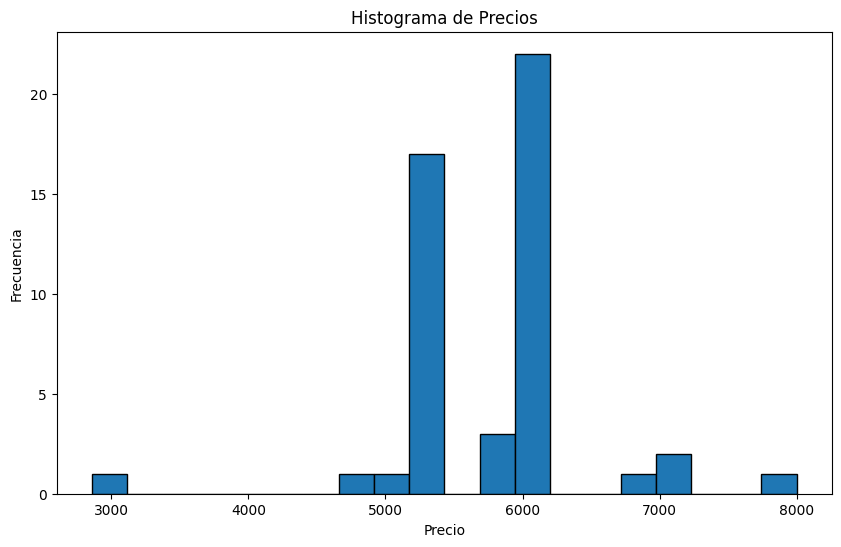

In [7]:
# Eliminar caracteres no numéricos y convertir la columna 'Precio' a tipo float
productos_df['Precio'] = productos_df['Precio'].astype(str).replace('[^\d.]', '', regex=True).astype(float)
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(productos_df['Precio'], bins=20, edgecolor='k')  # Ajusta el número de bins según tus necesidades

# Agregar etiquetas y título al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el histograma
plt.show()


Podemos apreciar facilmente que en el grafico que el valor cercano a 18000 como un outlier.

Ahora intentemos identificar los valores atipicos con alguna medida mas objetiva que el analisis visual:

Valores atípicos:
                                               Nombre  Precio
10                    Big Data - Walter Sosa Escudero  2860.0
21                                           Big Data  7200.0
26                   Big Data - Sosa Escudero, Walter  8000.0
30  Big Data. Breve Manual Para Conocer La Ciencia...  7200.0


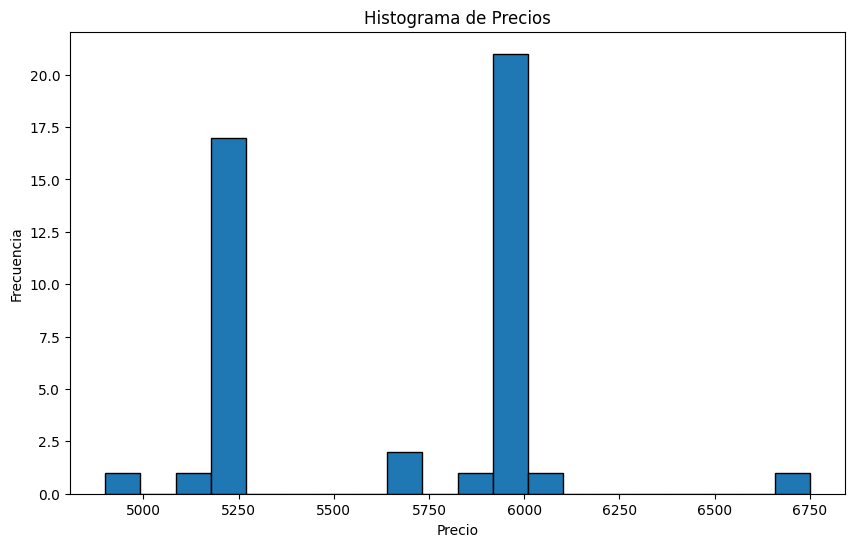

In [9]:
# Detectar y mostrar valores atípicos (Outliers)
Q1 = productos_df['Precio'].quantile(0.25)
Q3 = productos_df['Precio'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = productos_df[(productos_df['Precio'] < lower_bound) | (productos_df['Precio'] > upper_bound)]
print('Valores atípicos:')
print(outliers)

# Hacemos el droop de los valores atípicos
productos_df = productos_df.drop(outliers.index)

# Volvemos a graficar el histograma
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(productos_df['Precio'], bins=20, edgecolor='k')  # Ajusta el número de bins según tus necesidades

# Agregar etiquetas y título al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el histograma
plt.show()
